$\dot{\vec p} = \frac{1}{2B}[\vec{k} - (\vec k \cdot \vec p)\vec p] + \frac 1 2 \vec \omega \times \vec p$

$B = \mu \alpha /2\rho g h$

$\vec \omega = \nabla \times \vec v_{flow}$

$v_{flow} = Ar + \frac B r \implies \vec \omega = (0, 0, 2A)$ 

$A = \cfrac{-\Omega}{R_2^2/R_1^2-1} \space B = \cfrac{\Omega R_2^2}{R_2^2/R_1^2-1}$

$\dot{\vec R} =  v_0 \vec p $

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [20]:
A = 3
k = np.array([0, 0, 1]) # up vector
omega = np.array([0, 0, 2 * A])

In [19]:
def dot(pR, t, B, omega, k, v0):
    p = pR[:3]
    R = pR[3:]
    p = p / np.linalg.norm(p)
    p_dot = (k - k @ p * p) / (2 * B) + 1 / 2 * np.cross(omega, p)
    R_dot = v0 * p
    return np.hstack((p_dot, R_dot))

In [21]:
R0 = np.array([1, 2, 3])
p0 = np.array([0, 1, 0])
t = np.linspace(0, 1, 10)
B = 1
v0 = 0.1

sol = odeint(dot, np.hstack((p0, R0)), t, args=(B, omega, k, v0))


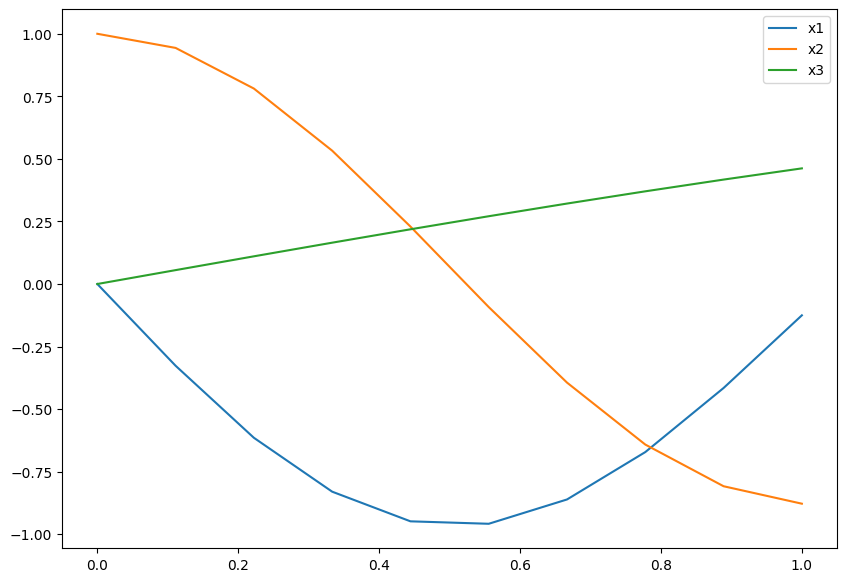

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(t, sol[:,0], label='x1')
plt.plot(t, sol[:,1], label='x2')
plt.plot(t, sol[:,2], label='x3')
plt.legend();

In [2]:
def data_for_cylinder_along_z(radius, height_z, null_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2 * np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z + null_z)
    x_grid = radius * np.cos(theta_grid)
    y_grid = radius * np.sin(theta_grid)
    return x_grid, y_grid, z_grid



In [3]:

ax = plt.figure().add_subplot(projection='3d')

ax.plot(sol[:, 3], sol[:, 4], sol[:, 5])

Xc,Yc,Zc = data_for_cylinder_along_z(R1, 0.2, 3)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)

plt.show()

plt.show()

NameError: name 'plt' is not defined

$\dot{\vec p^i} = \frac{1}{2B}[\vec{k} - (\vec k \cdot \vec p^i)\vec p^i] + \frac 1 2 \vec \omega \times \vec p^i, B = \mu \alpha /2\rho g h,  \vec \omega = \nabla \times \vec v_{flow}, \vec v_{flow} = (-Ay, Ax, 0)$ 

$\dot{\vec R^i} =  v_0 \vec p^i + \mu^T(\sum\limits_{i\neq j } \vec F_S^{ij} + \sum\limits_{j'} \vec F_W^{ij'})$